#**💡Titanic Dataset**

#🔍 1. General Data Exploration

❓Q. How to load the dataset.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')  #load the data

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


❓Q.  What are the basic details of the dataset? (rows, columns, data types)

In [5]:
df.shape  #shows rows * columns

(891, 12)

🔍 Insight: There is 891 rows and 12 columns.

In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


🔍 Insight: >int:  PassengerId,Survived, Pclass, SibSp, Parch
  >float : Age, Fare
  
  >object : Name, Sex, Ticket,Cabin, Embarked

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


❓ Q .Which features contain missing values, and what percentage is missing?

In [9]:
missing_values = df.isnull().sum()  #find null values

In [10]:
missing_percentage = (missing_values / len(df)) * 100 #convert into percentage

In [11]:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

In [12]:
missing_data

,Missing Values,Missing Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


🔍 Insight: Age has 177 null values


Cabin has 687 null values

Embarked has 2 null vlaues

❓ Q .What are the summary statistics for numerical features?

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


❓ Q .How many unique values are there in each categorical feature?

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


#🧠 2. Survival Analysis (Target Variable)

❓ Q .What percentage of passengers survived and died?

In [15]:
survival_percentage = df['Survived'].value_counts(normalize = True) * 100
print(survival_percentage)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


🔍 Insight: Approx 62% not survive and 38% survived

❓ Q .What does the survival distribution look like?

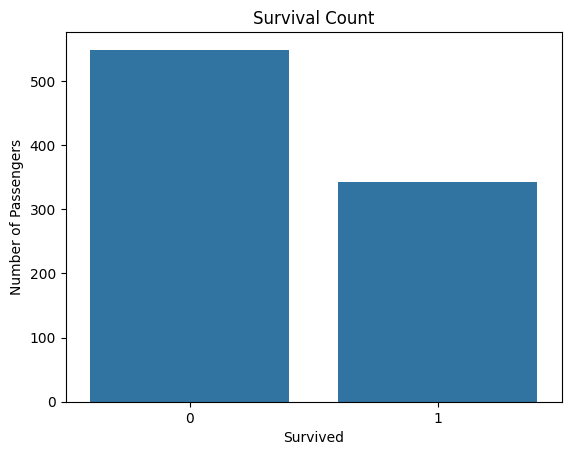

In [16]:
sns.countplot(x = 'Survived',data = df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

🔍 Insight: It shows that not survive is more than survived people

#👥 3. Demographics Analysis

❓ Q. What is the gender distribution of passengers?

In [17]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


🔍 Insight: Male is more than female

❓ Q .What is the survival rate by gender? Did women survive more than men?

In [18]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()*100
print(survival_by_gender)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


🔍 Insight: Female survived more than male

❓ Q .What is the age distribution of passengers?

In [19]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


❓ Q .What is the average age of survivors vs non-survivors?

In [20]:
average_age = df.groupby('Survived')['Age'].mean()
print(average_age)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


🔍 Insight:  Average 'Age' of survivors - 28


Average 'Age' of non-survivors - 28

❓ Q .Can we classify passengers as child/adult/senior and check survival patterns?

In [21]:
def age_category(age):
  if age<18:
    return 'Child'
  elif age >=60 :
    return 'Senior'
  else:
    return 'Adult'


df['Age_category'] = df['Age'].apply(age_category)


survival_by_age_group = df.groupby('Age_category')['Survived'].mean()*100
print(survival_by_age_group)

Age_category
Adult     36.436170
Child     53.982301
Senior    26.923077
Name: Survived, dtype: float64


🔍 Insight: Age- Senior<Adult<Child

#🪑 4. Class and Fare Insights

❓ Q .What is the distribution of passengers by class (Pclass)?




In [22]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


🔍 Insight: There are three types of class :- 1st, 2nd and 3rd class

❓ Q .Which class had the highest survival rate?

In [43]:
highest_survival_class = df.groupby('Pclass')['Survived'].mean()*100
highest_survival_rate = highest_survival_class.max()
print(highest_survival_rate)

62.96296296296296


🔍 Insight: 1st class had the highest survival rate

❓ Q .What’s the average fare paid in each class?

In [25]:
avg_class_fare = df.groupby('Pclass')['Fare'].mean()*100
print(avg_class_fare)

Pclass
1    8415.468750
2    2066.218315
3    1367.555010
Name: Fare, dtype: float64


🔍 Insight: 1st class paid the highest fare with average value 8415 and then 2nd class with 2066 and then 3rd class with 1367

❓ Q .From which ports did passengers embark most frequently?

In [26]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


🔍 Insight:  From 'S' port

❓ Q . Does embarkation port influence survival?

In [27]:
influence_embark = df.groupby('Embarked')['Survived'].mean()*100
print(influence_embark)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


❓ Q .Are there any missing values in "Embarked"? How to handle them?

In [28]:
df['Embarked'].isnull().sum()

np.int64(2)

In [29]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [30]:
df['Embarked'].isnull().sum()

np.int64(0)


🔍 Insight: Yes, there are 2 missing values, correct by using mode

❓ Q .Can you extract the title from the Name column (Mr, Mrs, Miss, etc.)

In [31]:
df['Title'] =  df['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip())
print(df[['Name','Title']].head())


                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


❓ Q .What are the most common titles, and how do they affect survival?

In [32]:
survived_by_title = df.groupby('Title')['Survived'].mean()*100
print(survived_by_title.sort_values(ascending = False))

Title
Lady            100.000000
Ms              100.000000
Sir             100.000000
Mme             100.000000
the Countess    100.000000
Mlle            100.000000
Mrs              79.200000
Miss             69.780220
Master           57.500000
Major            50.000000
Col              50.000000
Dr               42.857143
Mr               15.667311
Capt              0.000000
Jonkheer          0.000000
Don               0.000000
Rev               0.000000
Name: Survived, dtype: float64


❓ Q .Can you create a new column "FamilySize" using SibSp + Parch + 1?

In [33]:
df['FamilySize'] = df['SibSp']+df['Parch'] + 1
df['FamilySize'].head()

,FamilySize
0,2
1,2
2,1
3,2
4,1


❓ Q.Do passengers with family have higher chances of survival?

In [34]:
FamilySize_survival = df.groupby('FamilySize')['Survived'].mean()*100
print(FamilySize_survival.head())


FamilySize
1    30.353818
2    55.279503
3    57.843137
4    72.413793
5    20.000000
Name: Survived, dtype: float64


#💼 7. Cabin & Ticket

❓ Q .How many passengers have missing Cabin values? Should we drop or transform it?

In [35]:
df['Cabin'].isnull().sum()

np.int64(687)

In [36]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace = True)

In [37]:
df['Cabin'].isnull().sum()

np.int64(0)

🔍 Insight:  687 passengers have missing cabin values

❓ Q. Can you extract the deck letter from the Cabin column?

In [38]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'].unique()


array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

❓ Q. Do people sharing the same ticket number tend to have similar survival outcomes?

In [39]:
ticket_survival = df.groupby('Ticket')['Survived'].agg(['count','mean','std'])
shared_ticket = ticket_survival[ticket_survival['count']>1]
print(shared_ticket.head())

        count      mean      std
Ticket                          
110152      3  1.000000  0.00000
110413      3  0.666667  0.57735
110465      2  0.000000  0.00000
111361      2  1.000000  0.00000
113505      2  1.000000  0.00000


#📊 8. Correlation and Visualization

What is the correlation between numerical features (Fare, Age, Pclass)?❓ Q .

In [40]:
correlation = df[['Fare','Age','Pclass']].corr()
correlation

,Fare,Age,Pclass
Fare,1.000000,0.096067,-0.549500
Age,0.096067,1.000000,-0.369226
Pclass,-0.549500,-0.369226,1.000000


❓ Q .Can we visualize a heatmap of all numerical features?

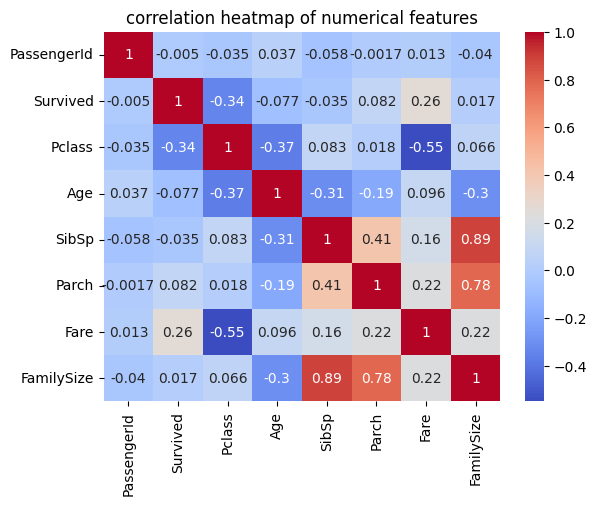

In [41]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot= True , cmap = 'coolwarm')
plt.title('correlation heatmap of numerical features')
plt.show()

❓ Q .Which variables are most correlated with survival?


In [42]:
numerical_df = df.select_dtypes(include=['number'])
survival_corr = numerical_df.corr()['Survived'].sort_values(ascending=False)
survival_corr

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
FamilySize,0.016639
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481
